Missing compiler_cxx fix for MSVCCompiler


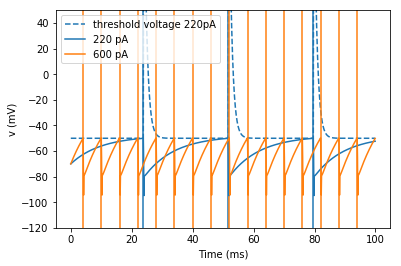

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

# Descrição dos parâmetros do modelo

Cm = 0.1*nfarad # capacitância da membrana
Rm = 100*Mohm # resistência da membrana
El = -70*mV # potencial de equilíbrio da membrana
Vl = -50*mV # valor limiar de tensão de emissão de disparo
vr = -65*mV # valor de tensão de repouso após 'resetagem'
Ek = -80*mV # potencial de equilíbrio da membrana
tau_Gx = 0.2*ms
duration = 100*ms
delta_Gx = 2*usiemens
vl_0 = -50*mV
tau_vl = 1*ms
vl_reset = 200*mV
start_scope()

eqs = '''dv/dt = ((El - v) / (Cm*Rm)) + ((Gx*(Ek - v)) / (Cm)) + (Ix/Cm) : volt 
dvl/dt = (vl_0 - vl) / tau_vl : volt
dGx/dt = -Gx/ tau_Gx : siemens
Ix :  amp
'''
G = NeuronGroup(1, eqs, threshold='v>vl', reset= "v=vr;vl=vl_reset;Gx=Gx+delta_Gx", method='euler', dt= 0.1*ms)
statemon_G = StateMonitor(G, ["v","Gx","vl"], record=True) # monitor de potencial
spikemon_G = SpikeMonitor(G) # monitor de spikes
G.Ix = [220]*pA
G.Gx = 0*usiemens
G.v = El
G.vl = -50*mV

K = NeuronGroup(1, eqs, threshold='v>vl', reset= "v = vr;vl=vl_reset;Gx=Gx+delta_Gx", method='euler', dt= 0.1*ms)
statemon_K = StateMonitor(K, ["v","Gx","vl"], record=True) # monitor de potencial
spikemon_K = SpikeMonitor(K) # monitor de spikes
K.Ix = [600]*pA
K.Gx = 0*usiemens
K.v = El
K.vl = -50*mV

run(duration)
plt.plot(statemon_G.t/ms,statemon_G.vl[0]/mV, "--", c='C0', label='threshold voltage 220pA') 
for t in spikemon_G.spike_trains()[0]:
    plt.axvline(t/ms,0,50, c='C0', lw=1.5)
for t in spikemon_K.spike_trains()[0]:
    plt.axvline(t/ms,0,50, c='C1', lw=1.5)
plt.plot(statemon_G.t/ms, statemon_G.v[0]/mV, label = "220 pA")
plot(statemon_K.t/ms, statemon_K.v[0]/mV , label = "600 pA")
plt.ylim((-120, 50))
xlabel('Time (ms)')
ylabel('v (mV)')
legend()
show()